
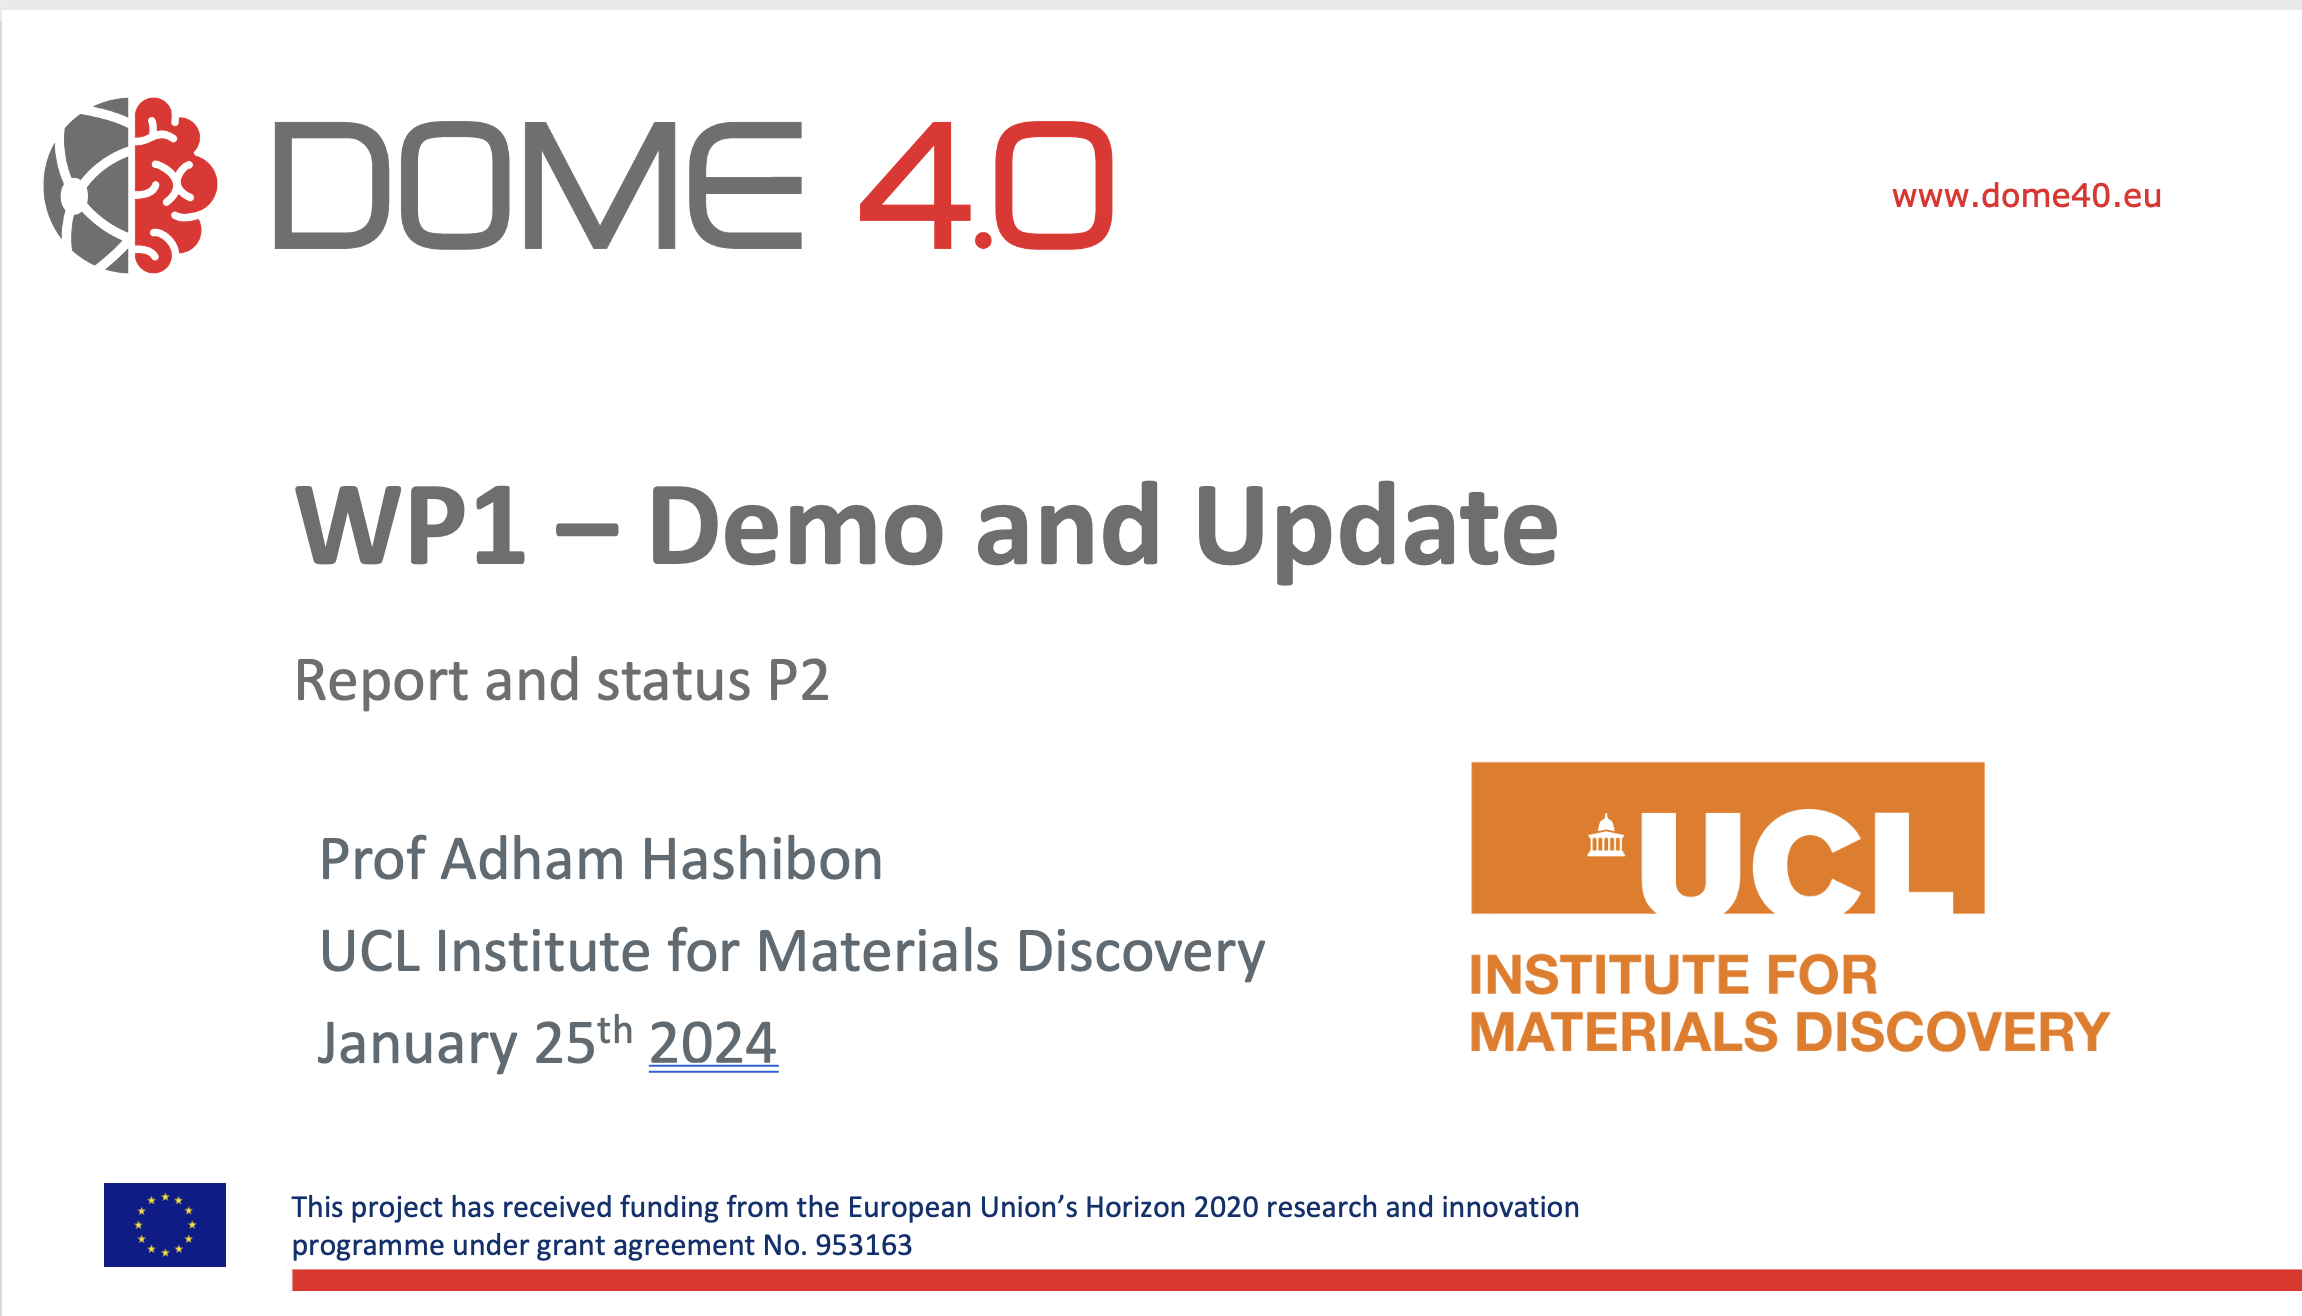


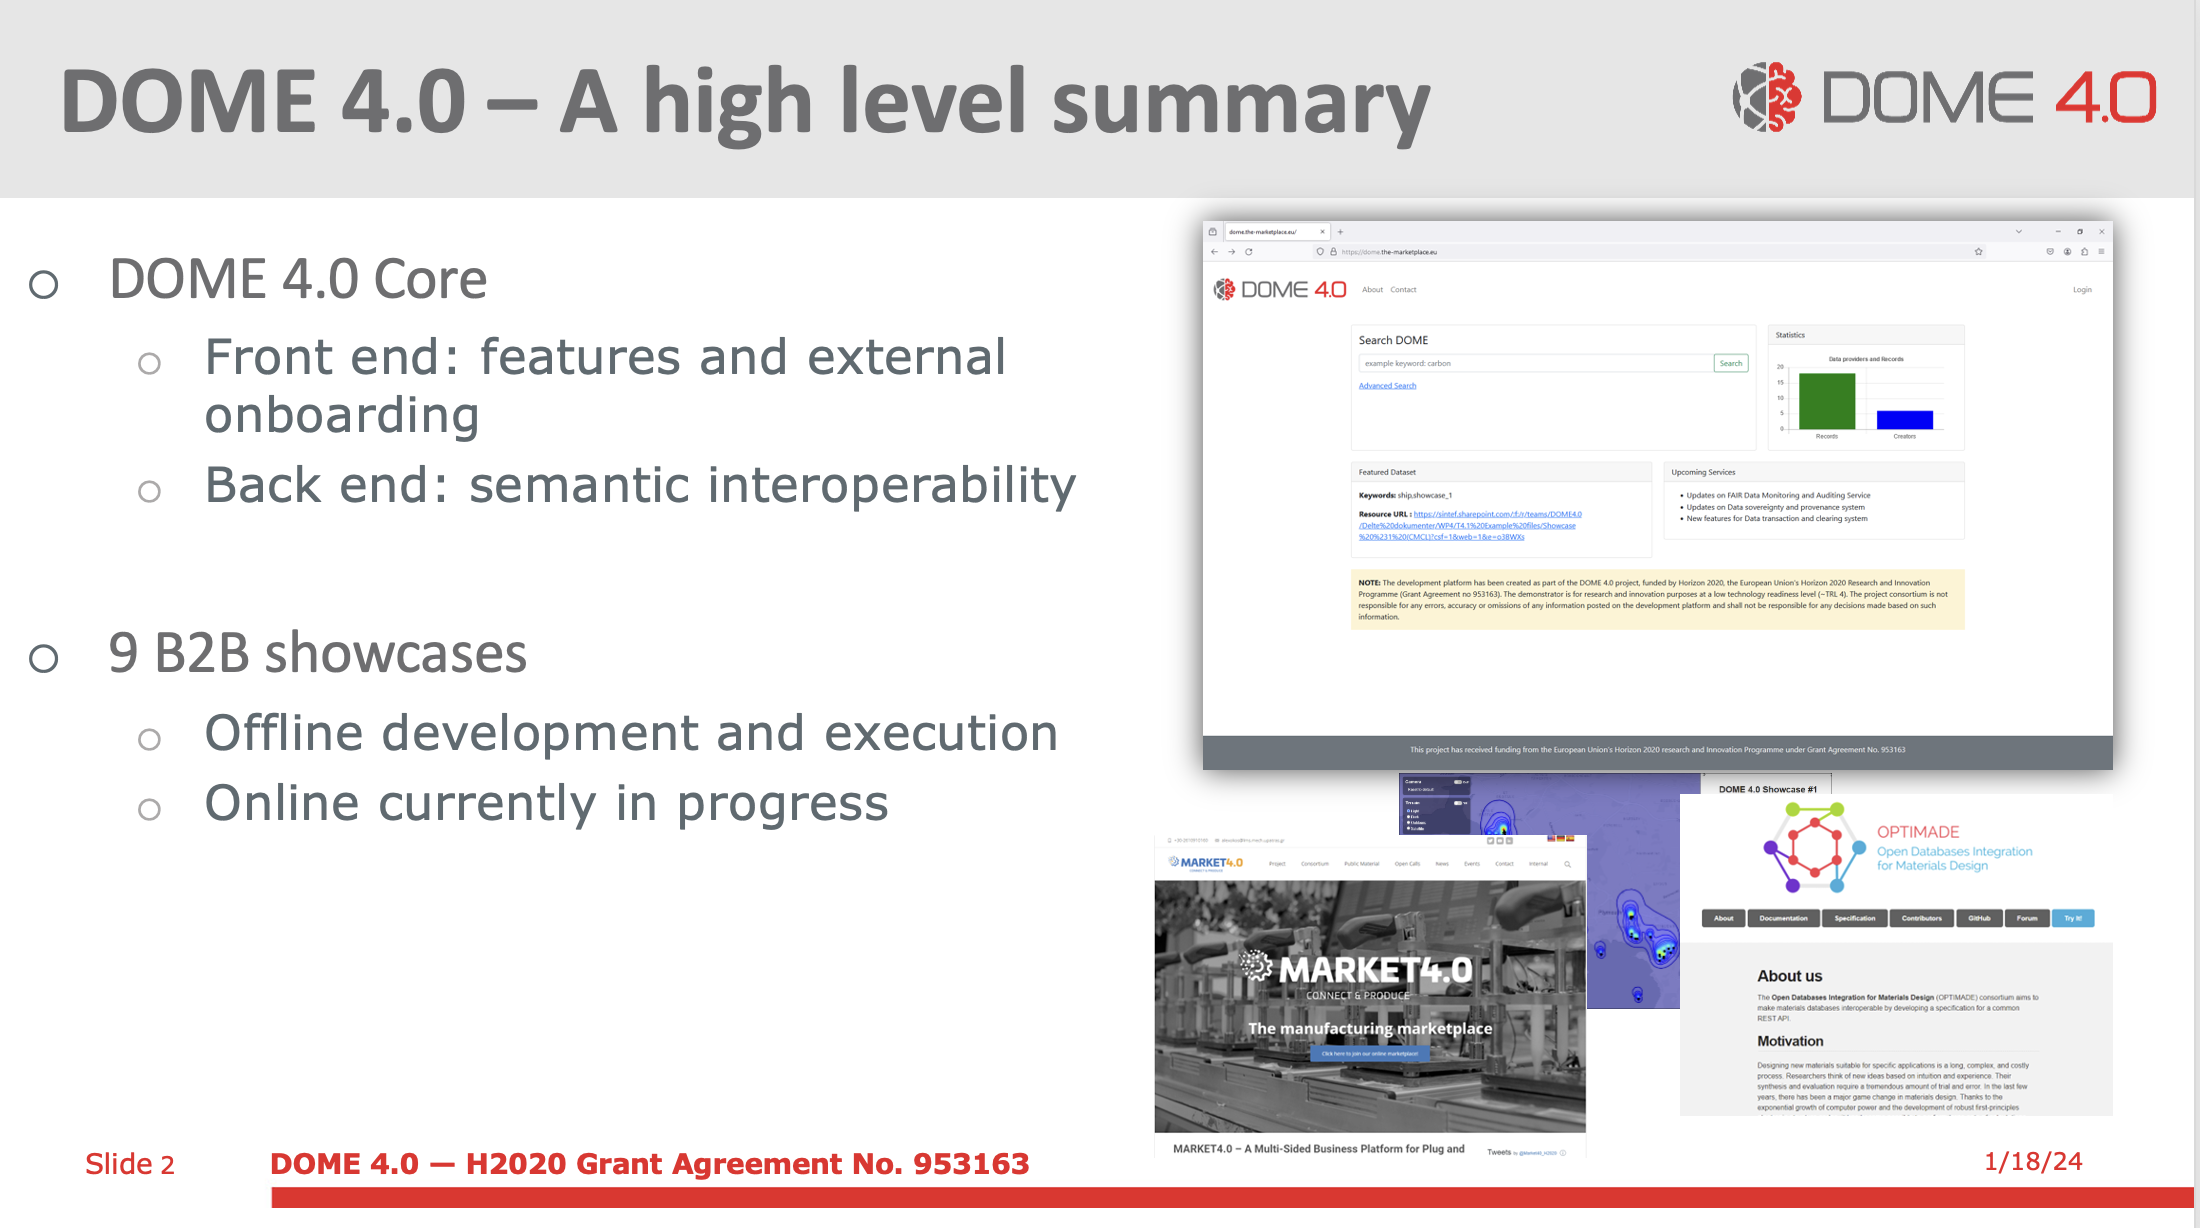

# Where are we now and where should we be? 
- Achievements:
  - [X] Functional, online, publicly acDevelopment/Stablecessible staging and production platforms
    - [X] [Development/Stable](https://dome.the-marketplace.eu)
    - [X] [staging/Unstable](https://dome-staging.the-marketplace.eu) 
  - [X] Focus on **core** features and capabilities - proiratised rapid implementation over deeper features and details
  - [X] Eco System Ontology based on EMMO and open EU materials modelling marketplaces
  - [X] 9 B2B show cases - offline execution 

# Now..
- Build on the existing developments within and outside DOME 4.0 and add depth!
- we can focus on deeper features to enable efficient, robust feature set
- enabling integration with semantic EU data landscape and
- provide better support for DOME 4.0 users




## This means mainly focusing on the back end
- Improved Performance and Speed 
- Improved Semantic Interoperability --> cosolidation of ontologies  
- Improved Data Management and Integration --> use of semantic data structures internally 
- Flexibillity in Front End Design --> better visualisation and user experience 
- Advanced Features --> e.g. Sparql interfaces 

# Outline
- Overview of the state of the platform - the front and backends
- Overview of the ontology Eco system consolidation (technical mainly)
- Integration of third party standard ontology similar to that used by the [EU data infrastructure](https://data.europa.eu/data/sparql?locale=en)
- Overview of further deeper development from SimPhony to Ontology-Manager, OntoVis, SigraDB stack
- Demo: Synthetic case study of the backend
- Roadmap for the next period --> integration and release towards EOP

# Outline of the Demo: Synthetic case study of the backend
- Load ontology eco system
- Create fully semantic data sets (Tier1: compliant with DOME 4.0 data Set Ontology)
- Store in a Graph Enabled Backend (GDB)
- Demonstrate Visualisation and SparQL query
- Demonstrate provenance basics (mostly in the review meeting)
- Integration with EuroSciVoc as Semantic Keywords!
- Linking with External Data provider (and creator): Materials Project (synthetic case)

# Technical tasks
## Create initial Tier1 repository for DOME 4.0 --> will be extended to actual systems, like with the IDMT!

- [X] *Create data sets*  a ~ bunch (20-100) synthetic datasets according to the data set ontoly (Tier1) using "SimPhoNy-rdflib"
- [X] *Graph Data Base* store the datasets and the dome core ontology in a new RDF and GDB backend (sigraDB)
- [X] *Semantic query* run  sparql query e.g., search all by keyword, and search for all datasets by specific issued data, later also search datasets accessed by specific user. 
- [X] *Visualisation* for each results of query show graphs!
- [ ] *User Access* create synthetic user data base for testing Provenance (based on User ontology)
- [ ] demonstrate provenance 
- [ ] fetch real data records from materials project

##### Internal Note: 

This work is largely based on D3.6, it extends SimPhoNy-Future into a new Package developed specifcally with DOME requirements in mind: Ontology-Manager, OntoVIS and sigraDB. 

DomeDataSet from D3.6 is in /Users/adham/dev/dome/Ontology-matters/domeo/domeo.ttl


In [1]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL
from datetime import date

In [2]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from ontodot.ontodot import vis, random_date_time, auto_bind_namespaces, printH, generate_uuid, generate_random_materialproject_id
from ontodot.ontodot import OntoVis

In [4]:
from types import SimpleNamespace
import os, random

In [5]:
dome=SimpleNamespace() # This is equivalent to a *SimPhoNy lightweight session*

# Load the DOME 4.0 ecosystem CORE ontology 

In [6]:
dome.g=Graph(bind_namespaces="rdflib")
dome.ns=Namespace('https://dome40.eu/semantics/dome4.0_core#')
dome.path = "/Users/adham/dev/ontology/dome/Ontology-matters/"
dome.file='dome4.0_core_tbox.ttl'

# Store the Ontology into a Graph DB 

## Load the Materials Informatics Ontology (MIO) 
- MIO is a new top level ontology compliant with EMMO but is  optimised for practical applications
- EMMO requires heavy use of reasoners as it is built on logic,
- This poses heavy constraints on applications, as one has to deal with complex structures [composite complex classes](https://www.w3.org/TR/owl2-primer/#Advanced_Class_Relationships) requiring intensive inference in real time
- MIO is simple and focuses on practical applications, especially for software engineering perspective

In [7]:
mio=Graph(bind_namespaces="rdflib")
mio.parse("/Users/adham/dev/ontology/ontology_manager/MIO/mio/mio.ttl")

<Graph identifier=Ne9578a2688b94ef894a3e4b4e4c98f13 (<class 'rdflib.graph.Graph'>)>

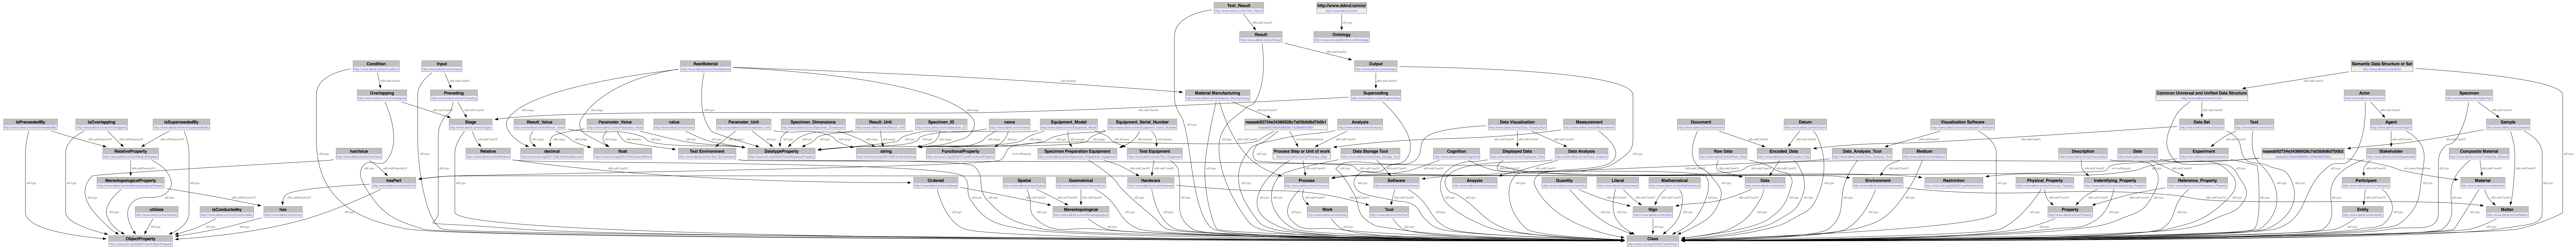

In [8]:
vis(mio)

In [9]:
dome.g.parse(os.path.join(dome.path, dome.file))
# we could add it to mio_manager manually actually, then use it as we want, 

<Graph identifier=N7ddbc0f4835d451c9c1cb0b685341986 (<class 'rdflib.graph.Graph'>)>

In [10]:
gg=dome.g + mio
vis(gg)

InvocationException: Program terminated with status: 1. stderr follows: Error: syntax error in line 1 
... <B></B> ...


# What did we consolidate?
- we focused on transcribing the needed concepts from EMMO, VIMMP, etc to the needs of the DOME 4.0 Eco system
- All Data in DOME 4.0 backend are Ontology classes
- Allows seamless integration of new ontologies
- We will show the case study for the EuSciVoc! 

# Advanced Visualisation and integration of ontology 
We rely on [RDFLIB](https://rdflib.readthedocs.io/en/stable/#) like many other open source programs for RDF management, but augment it with additional tools both in house and external!
- OntoVis, SimPhoNy, Ontology Manager, SigraDB, OMI, are in house

In [ ]:
# Using the power of RDFLIB it is easy to combine ontology: 
gc=dome.g+mio
# Using the new OntoVis: Visualisation and inspection is easy (including also animated fancy demo..) 
ovis = OntoVis(gc)

In [ ]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#data_set"), 2))

# Integration of numerous Ontology

(an eco system of data needs an eco system of ontology!)

In [ ]:
# these are bindings (RDFLIB) 
binds="""
@prefix domeES: <http://dome40.eu/semantics/dome4.0_core#> .
@prefix mio: <http://www.ddmd.io/mio/> .
@prefix dcat: <http://www.w3.org/ns/dcat#> .
@prefix dcterms: <http://purl.org/dc/terms/> .
@prefix euroscivoc: <http://data.europa.eu/8mn/euroscivoc/> .
@prefix evmpo: <https://emmc.eu/semantics/evmpo/evmpo.ttl#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix http-meth: <http://www.w3.org/2011/http-methods#> .
@prefix msm: <http://iserve.kmi.open.ac.uk/ns/msm#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix skos: <http://www.w3.org/2004/02/skos/core#> .
@prefix xs: <http://www.w3.org/2001/XMLSchema#> .
"""


In [ ]:
nsbinds=auto_bind_namespaces(dome.g, binds)

In [ ]:
print(nsbinds)

# We create  SimPhoNy-CUDS
- CUDS: Common Universal/Unified Data Structures! 
- Check the MIO and domeES ontology! 

In [ ]:
cuds=SimpleNamespace() # we use now simple version, no checks for the demo
cuds.g=Graph()
cuds_collection=set()

In [ ]:
num_data_sets=10 # the number of synthetic data sets we want to create
domeES=nsbinds['domeES']
mioNS=nsbinds['mio']

# Connecting a `Value` property to an `entity` more efficiently 
## We avoid multiplication of relation entities and concept entities with the cost of increased (semantic) verbosity.

(more details later)

### Can ease the need for complex reasoners and makes SPARQL easy to write. 
e.g. instead of saying 

        `a data set` hasDate `2024-03-19 13:43:32.991488'(Literal)` 
        
        we say: 
        
        `a data set` hasPart 'a Date` (which is a class instance) 
        'a Date`  hasValue `2024-03-19 13:43:32.991488'(Literal)` 

        here `a somethin` is an instance, i.e., a particular. 

        Tech details:
        
        We can make an utility "macro" that takes: 

        1. a class instance (s) 
        2. a class instance relating to a property (p) (Date, Color, etc.0 
        3. the value (v) of the property, and composes:

        add_property(s,p,v):
            g.add(s, hasPart, p) 
            g.add(p, hasValue, v)
        
        Another utility is to create an individual (instance) of certain type providing hte name (IRI) and the type class: 

        s= create_class(name:URIref, type: Class)

In [ ]:
#Since this is a demo, we make our own creator, publisher, ...
random_creator = lambda: random.choice(["Amit Bhave", "Silvia Chiacchiera", "Bjorn Tore", "Owain Baynon", "Adham Hashibon"])  # these will be instances later of a User/Dataproider etc. 
random_publisher = lambda: random.choice(["CMCL", "FRAUNHOFER", "SINTEF", "BOSCH", "SIEMENS", "Nature Scientific Data", "MaterialsProject.prg"])  # these will be instances later of a User/Dataproider etc. 
random_keywords = lambda k: random.sample(s.split('\n'), random.randint(3, 6))

# Let us use <span style="color:red;"> EuroSciVoc </span> as True Semantic keywords!
## and integrate with `MIO+domeES` ontology! 
- Load the EuroSciVoc ontology (mostly individuals, but with clear hierarchy)
- Use SPARQL to pick all the concepts that are relevant for [engineering and technology](https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac&lang=en)
- for the demo: Make a function to select randomly 1 to 5 such semantic keywords, and add it to the dataset.

### **Note** we add the entire keywords directly, i.e. we reuse it as is, with all supported languages etc. 
#### This is probably an overkill but shows how we can attain complete practical and real <span style="color:green;"> compliance, and in fact use of European Infrastrcutre and investments</span>.
  

In [ ]:
esvoc = SimpleNamespace()
esvoc.g = Graph()
esvoc.desc = "the EuroSciVoc"
esvoc.path = "/Users/adham/dev/dome/Ontology-matters/external/EuroSciVoc-skos-ap-eu_1.3.ttl" # Once we find and end point, we can get this from teh net directly. 
esvoc.g.parse(esvoc.path)
# SPARQL query to choose all elements narrower than engineering and technology. 
q="""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?narrowerConcept ?narrowerLabel 
WHERE {
    ?narrowerConcept skos:broader+ <http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac> .
    ?narrowerConcept skos:prefLabel ?narrowerLabel .
        FILTER(LANGMATCHES(LANG(?narrowerLabel), "en"))
}
"""
# Noe the UUID may change between versions,  need to confirm! 

In [ ]:
# run the query 
esvoc.r = esvoc.g.query(q)

In [ ]:
#for i in esvoc.r:
#    print(i)
printH(f" We find {len(esvoc.r)} semantic keywords relevant for technology and engineering")

In [ ]:
esvoc.r_formated = [{'IRI': str(row.narrowerConcept), 'Label': str(row.narrowerLabel)} for row in esvoc.r]
esvoc.random = lambda r: random.sample([[r_['IRI'], r_['Label']] for r_ in r], random.randint(2, 6))
for i in range(3):
    print(esvoc.random(esvoc.r_formated))

In [ ]:
for i in range(1, num_data_sets + 1):

    cuds.ds = URIRef(f"{domeES}DS_{i}")
    cuds.g.add((cuds.ds, RDF.type, domeES.data_set))
    
    # Add the required DOME 4.0 Data Set Ontology attributes
    # These are cuds.add(spo triplet)
    # cuds.uri = URIRef(f"http://materialsproject.org/data/calc_{i}")

    mpid=generate_random_materialproject_id()
    #uri = URIRef("https://next-gen.materialsproject.org/materials/mp-19149")
    uri=URIRef(f"https://next-gen.materialsproject.org/materials/{mpid}")
    cuds.g.add( (uri, RDF.type, domeES.URI) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, uri))
    
    printH(f"this is a DOME 4.0 Data Set: {cuds.ds}")
    printH(f"this Data Set point to: {uri}")

    wp = URIRef("https://next-gen.materialsproject.org/")
    cuds.g.add( (wp, RDF.type, domeES.web_platform) ) 
    cuds.g.add((cuds.ds, domeES.hasPart, wp))

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.issued_date) )    
    the_date=Literal(random_date_time())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_date) ) 

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.description) )    
    the_value=Literal("This is a description that will change later")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.data_creator) )    
    the_value=Literal(random_creator())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.license) )    
    the_value=Literal("CC-BY 4.0")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )


    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.data_publisher) )    
    the_value=Literal(random_publisher())
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )

    dc = URIRef(f"{domeES}/{generate_uuid()}")
    cuds.g.add( (dc, RDF.type, domeES.title) )    
    the_value=Literal("this is a title placeholder")
    cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
    cuds.g.add( (dc, mioNS.hasValue, the_value) )


    # get some semantic EUROSCIVOC keywords for demo 
    ks=esvoc.random(esvoc.r_formated)
    for k in ks:
        print(k[1])
        dc = URIRef(k[0])
        cuds.g.add( (dc, RDF.type, domeES.semantic_keyword) )    
        cuds.g.add( (dc, RDFS.label, Literal(k[1]) ))    
        cuds.g.add( (cuds.ds, domeES.hasPart, dc) )
        
   # g.add((data_set_uri, mio.hasPart, domeES.syntactic_keyword))
    

### Any data set (given as a IRI in general) **can be a DOME 4.0 Data Set**, this is simply achieved with the following line:

```
g.add((someURI, RDF.type, domeES.data_set))

```

In [ ]:
vis(cuds.g+dome.g+mio)

In [ ]:
gc=cuds.g+dome.g+mio
ovis = OntoVis(gc)

In [ ]:
vis(ovis.zoom_in(URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2"), 3))

In [ ]:
inspect_iri=URIRef("http://dome40.eu/semantics/dome4.0_core#DS_2")
q="""
SELECT ?predicate ?object
WHERE {
    <http://dome40.eu/semantics/dome4.0_core#DS_2> ?predicate ?object .
}
"""
DS99 = Graph()
r=gc.query(q)
for i in r:
    DS99.add((inspect_iri, i.predicate, i.object))
    q2 = f"""
    SELECT ?predicate ?object
    WHERE {{
        <{i.object}> ?predicate ?object .
    }}
    """
    r2 = gc.query(q2)
    for j in r2:
        DS99.add((j.object, j.predicate, j.object))
        print(j.object, j.predicate, j.object)

In [ ]:
for s, p, o in DS99:
    print(s, p, o)

In [ ]:
vis(DS99)

In [ ]:
q = """
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX domeES: <http://dome40.eu/semantics/dome4.0_core#> 

    SELECT ?s ?p ?o ?oLabel
    WHERE {
        ?s ?p ?o .
        ?o rdfs:label ?oLabel .    
        ?o rdfs:label "medical engineering" .
        }
"""


In [ ]:
r=gc.query(q)

In [ ]:
for i in r:
    print(i)
    